# 1. Import Libraries

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

warnings.filterwarnings("ignore")

np.random.seed(12345)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 2. Read Data

In [2]:
data = pd.read_csv("job_acceptance_dataset.csv")

data

,age,experience,gpa,degree,position,expected_salary,result
0,29.0,7,2.71,bachelor,secretary,19500,accept
1,29.0,4,NaN,bachelor,secretary,20500,accept
2,27.0,2,3.40,doctorate,accountant,43000,reject
3,33.0,11,3.25,bachelor,NaN,39000,reject
4,34.0,9,3.22,master,engineer,46500,reject
...,...,...,...,...,...,...,...
85,30.0,9,2.95,doctorate,accountant,48500,accept
86,28.0,6,3.31,master,engineer,45500,NaN
87,24.0,1,3.48,master,secretary,21500,accept
88,NaN,2,3.88,bachelor,accountant,32000,reject


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              89 non-null     float64
 1   experience       90 non-null     int64  
 2   gpa              89 non-null     float64
 3   degree           90 non-null     object 
 4   position         89 non-null     object 
 5   expected_salary  90 non-null     int64  
 6   result           89 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.0+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
# no NaN to remove
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,age,experience,gpa,expected_salary
count,86.000000,86.000000,86.000000,86.000000
mean,27.872093,3.186047,3.280581,32209.302326
std,4.375860,3.197468,0.511957,9194.456487
min,21.000000,0.000000,2.520000,15000.000000
25%,24.000000,0.250000,2.890000,25500.000000
50%,28.000000,2.000000,3.280000,32000.000000
75%,31.750000,5.000000,3.567500,38500.000000
max,35.000000,13.000000,6.000000,54500.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

In [7]:
data = data[data["gpa"] <= 4]

# 4. Split Dataset into Training & Test Sets

In [8]:
target_name = "result"
feature_name = list(data.columns.drop(target_name))

In [9]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [11]:
numerical_feature = ["age", "experience", "gpa", "expected_salary"]
categorical_feature = ["degree", "position"]

In [12]:
for feature in categorical_feature:
    print(feature, ":", np.unique(X_train[feature]))

degree : ['bachelor' 'doctorate' 'master']
position : ['accountant' 'engineer' 'secretary']


In [13]:
ordinal_feature = ["degree"]
nominal_feature = ["position"]

In [14]:
np.unique(data["degree"])

array(['bachelor', 'doctorate', 'master'], dtype=object)

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [15]:
categories = [
    np.array(["bachelor", "master", "doctorate"], dtype=object),
]

In [16]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [17]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [18]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + "_" + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [20]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [21]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [23]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [24]:
clf = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation="relu",
    # solver="sgd",
    alpha=0,
    batch_size=X_train_scaled.shape[0],
    learning_rate_init=0.01,
    max_iter=1000,
    momentum=0,
)

## 6.2. Train Model

In [25]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0, batch_size=68, hidden_layer_sizes=(10, 5),
              learning_rate_init=0.01, max_iter=1000, momentum=0)

## 6.3. Loss curve

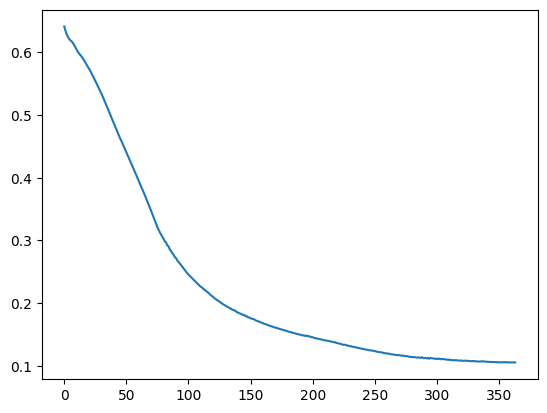

In [26]:
plt.plot(clf.loss_curve_)

## 6.4. Model's Weight & Bias

In [27]:
clf.coefs_

[array([[ 1.01045568, -0.13678635, -1.68481681,  0.49290421, -0.86885952,
         -0.43204097,  0.21258814,  1.41253508,  0.34017051,  0.6262154 ],
        [ 0.99401987,  0.64416687,  0.12762434,  1.39354326,  0.34860489,
          0.00453695, -0.12698616,  0.26078715, -0.00794107,  0.31178566],
        [ 0.63011459,  0.54082325,  0.98582199, -0.36296905,  0.95138146,
         -0.15306853, -0.099892  ,  0.01500741, -0.12309461,  0.12130754],
        [-0.47206161,  0.99308501,  0.05893703,  0.87252617,  1.28302495,
         -0.45342444, -0.25627744, -0.22915855,  0.60866264, -0.17381267],
        [-1.66537076, -1.72297127,  1.18861391, -1.11677886, -1.57569005,
         -0.41229158,  1.14328569, -1.02548607,  0.19607056,  1.64242571],
        [-0.33348088,  0.47064615, -0.3464143 ,  0.58649162, -0.35506858,
         -0.55365486,  0.42865834,  0.23442564,  0.47200214,  0.16401575],
        [ 0.28809753,  0.82076426,  0.11958688, -0.55475729,  0.62004766,
          0.13307137,  0.1182701

In [28]:
clf.intercepts_

[array([-0.15845355,  0.14703839,  0.12256855, -0.10193714,  0.01664606,
        -0.37261746,  0.32847831, -0.14002085,  0.2591776 ,  0.11386113]),
 array([ 0.08641594,  0.47498241,  0.03786453, -0.14934974,  0.42073368]),
 array([2.09892398])]

# 7. Prediction

## 7.1. Training Set

In [29]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [30]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

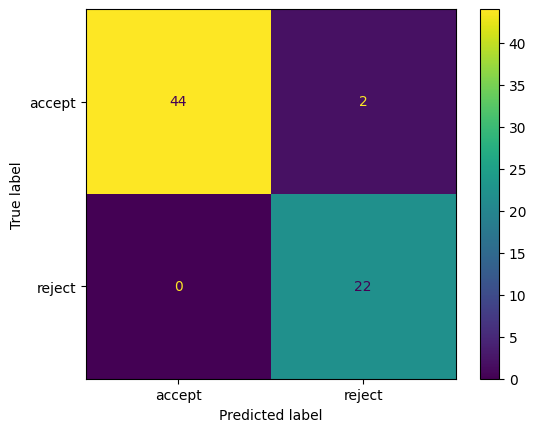

In [31]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [32]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [33]:
print("accuracy =", report["accuracy"])

accuracy = 0.9705882352941176


In [34]:
report["accept"]

{'precision': 1.0,
 'recall': 0.9565217391304348,
 'f1-score': 0.9777777777777777,
 'support': 46}

In [35]:
report["reject"]

{'precision': 0.9166666666666666,
 'recall': 1.0,
 'f1-score': 0.9565217391304348,
 'support': 22}

## 8.2. Test Set

### 8.2.1. Confusion Matrix

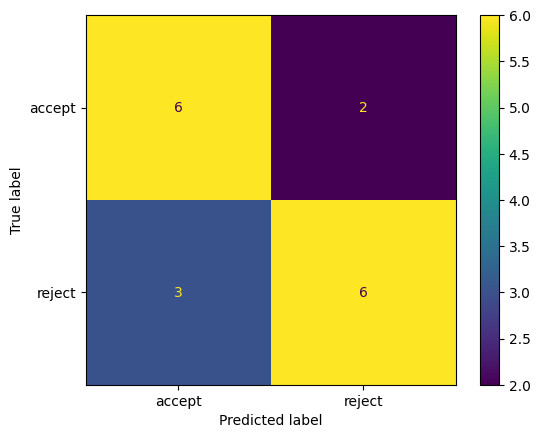

In [36]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [37]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [38]:
print("accuracy =", report["accuracy"])

accuracy = 0.7058823529411765


In [39]:
report["accept"]

{'precision': 0.6666666666666666,
 'recall': 0.75,
 'f1-score': 0.7058823529411765,
 'support': 8}

In [40]:
report["reject"]

{'precision': 0.75,
 'recall': 0.6666666666666666,
 'f1-score': 0.7058823529411765,
 'support': 9}

# 9. Model Deployment

In [41]:
import pickle

In [42]:
pickle.dump(
    (
        clf,
        ordinal_encoder,
        one_hot_encoder,
        scaler,
        feature_name,
        numerical_feature,
        ordinal_feature,
        nominal_feature,
    ),
    open("job_acceptance_model.pickle", "wb"),
)